# Machine Learning and Statistics : Boston House Prices Assessment
***

Before I get into any project, I like to import all the libraries I will be using.

In [224]:
### import libraries necessary for the project

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.stats.weightstats as ws
import matplotlib.pyplot as plt
import keras as kr
import seaborn as sns
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from keras.callbacks import EarlyStopping

***

### SECTION 1. THE BOSTON HOUSE PRICES DATASET

The Boston House Prices dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Massachusettes. The dataset consists of 506 samples across 14 variables (columns). Please see below for a description of the 14 variables. (1)


#### Boston Housing Dataset Columns


- CRIM: Per capita crime rate by town.
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tractbounds river; 0 otherwise).
- NOX: Nitric oxide concentration (parts per 10 million).
- RM: Average number of rooms per dwelling.
- AGE: Proportion of owner-occupied units built prior to 1940.
- DIS: Weighted distances to five Boston employme.=nt centers.
- RAD: Index of accessibility to radial highways.
- TAX: Full-value property tax rate per 10,000 USD.
- PTRATIO: Pupil-teacher ratio by town.
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town.
- LSTAT: Percentage of lower status of the population.
- MEDV: Median value of owner-occupied homes in $1000s.

I could not find out exactly why the Boston House Price dataset is so popular especially with early learners of regression and machine learning, but I suppose it's because the dataset is very manageable. It is not loaded with a lot of data and the data is very clean.<br><br>
To get an idea of what is in the dataset, I will import the dataset via csv file and printout the first 5 lines.

#### LOAD DATASET

In [225]:
### CSV module is a built-in function that allows Python to parse these csv types of files.
### use the import function to import the 'real' data set.
### I used the following to download the dataset https://github.com/selva86/datasets/blob/master/BostonHousing.csv (1a)

import csv

In [226]:
### use open function to open the file with the data.

a = open("bostonhousing.csv")

In [227]:
### The reader object allows iteration, much like a regular file object does. This allows for iteration over each row 
### in the reader object and the print out of the line of data, minus the commas. This works because each row is a list
### and we can join each element in the list together, forming one long string.[6]
### This is done for the complete dataset.
### df = pd.read_csv("bostonhousing.csv") creates the data frame for the data set.
### The df.head() function gives us the first five lines of the data set.

csv_a=csv.reader(a)
df = pd.read_csv("bostonhousing.csv")
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


I want to check to see if there are any NA in the dataset. I need a clean dataset otherwise it will effect some of code I have below. i.e. m.fit will show a loss of nan if there is/are NA in the dataset. I will do this by running df.insnull().any. (2)

In [228]:
nl = df.isnull().any()
nl

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool

Since all Falses were returned, it means the dataset is void of any NAs. We are good to proceed.

Since both the assessment questions relate to the median price of the houses, I will use some plots to get a good visualization of the median house prices. The first plot will be the distribution plot of the median house value.
The way I will do this is to use a distibution plot using the seaborn library.

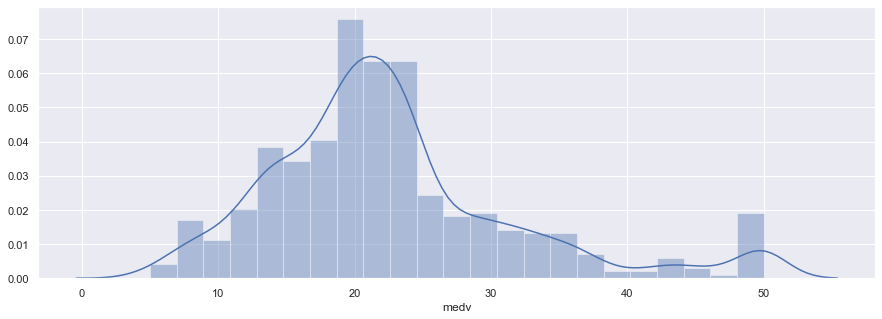

In [229]:
sns.set(rc={'figure.figsize':(15.0,5.0)})
sns.distplot(df['medv'])
plt.show()

The distribution is fairly normal with a few outliers. It also shows that a good amount of houses' median values are in the 19,000 to 25,000 range.<br>
To get a better visualization of the data, I'll plot the frequency by median value (medv) using a basic histogram plot.

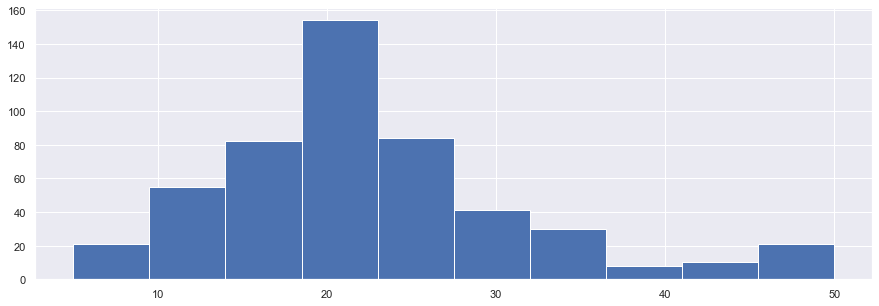

In [230]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
df['medv'].hist()

Again this just supports the distribution plot in showing a fairly normal distribution and also gives a good overall visualization to the median value of house prices in Boston based on the dataset.

The plots are nice and give a good idea of the median house price but I'm a numbers gut. I also want to see some basic stats like maximum price, minimum price and mean price. This will give me a good idea of the numerical values related to the dataset. To do this, I'll just run a describe on the MEDV column.


In [231]:
df['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

So we see that the max value is 50.0 and the min value is 5.0 with a mean of 22.532. 
***

### SECTION 2. MEDIAN HOUSE PRICE DIFFERENCE

I will use inferential statistics to analyse whether there is a significant difference in the median house prices
that are along the Charles River verse those that aren't. More specifically, I will use a t-test.
"A t-test is a parametric test which tells you how significant the differences between group sare;In other words, 
it lets you know if those differences(measured in means/averages) could have happened by chance." (3)<br>
Before we run the t-test, I need to calculate the median values of the houses along the Charles River and the houses not along the Charles River.

You'll notice in the dataset, that the CHAS column is filled with either a 0 or a 1. 0 means that the house is not on the Charles River and 1 means that it is on the Charles River. This is important because this will help us to answer our first question, is the median value of a house along the Charles River more than one that is not? Below I will separate the the 0 and 1 by calling them o and n respectively and then determining there median values as well as their count.

In [232]:
o = df[df['chas'] == 1.0]
n = df[df['chas'] == 0.0]

In [233]:
# calculate the number in each category and then calculate means of those categories.
nA = len(o)
nB = len(n)
print('The number of houses on the Charles River is:',(nA))
print('----------------')
print('The number of houses NOT on the Charles River is:',(nB))
print('----------------')
mo = np.mean(o.medv)
mn = np.mean(n.medv)
print('The mean price for a house on the Charles River is:',(mo))

print('----------------')
print('The mean price for a house NOT on the Charles River is:',(mn))




The number of houses on the Charles River is: 35
----------------
The number of houses NOT on the Charles River is: 471
----------------
The mean price for a house on the Charles River is: 28.44
----------------
The mean price for a house NOT on the Charles River is: 22.093842887473482


### t test

To find out if there is a difference between the median value of a house on the Charles river and a house not along the Charles River, I will use a t-test.
A t-test will test the null hypotheses. the null hypothesis in medain value is whether the median value of a house along the Charles River is EQUAL to a house not along the Charles River. An important note to make is that the data in the Boston Housing dataset is just a small sample of the population of houses in Boston. The t-test will provide a result based on the population.

In [234]:
print(stats.ttest_ind(o['medv'], n['medv']))

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


Based on the pvalue, where P < .001, in the results of the t-test, we would reject the null hypothesis. This basically says that the means of the the two populations are different.
***

### SECTION 3. PREDICTING THE MEDIAN HOUSE PRICE

These are the steps I will take in building my prediction model:
> 1. Scale the data.<br>
> 2. Build the model utilizing a neural network and adding layers.<br>
> 3. Split the dataset into training and test groups.<br>
> 4. Train the neural network model.<br>
> 5. Predict the median house value.<br>
> 6. Evaluate the results.

#### SCALE DATASET

I want to scale the dataset. I do this because some numbers in the dataset are in thousands, some are from 0 to 2 or 1 to 10. This makes it difficult for the initialization of the neural network. using the scale feature ensures that the input features have similar orders of magnitude. (4)

In [235]:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing per Ian McLoughlin github page (5)
xscale = pd.DataFrame(pre.scale(df), columns=df.columns)


#### BUILD MODEL

In [294]:
# create a neural network
m = kr.models.Sequential()

# add neurons
m.add(kr.layers.Dense(260, input_dim=13, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(260, activation="relu"))
m.add(kr.layers.Dense(260, activation="relu"))

# add layer to output prediction of MEDV, therefore size equals 1.
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     
                      
# compile the model
m.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])


In [295]:
#use summary() to show layer, shape and number of parameters in the model
m.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 260)               3640      
_________________________________________________________________
dense_84 (Dense)             (None, 260)               67860     
_________________________________________________________________
dense_85 (Dense)             (None, 260)               67860     
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 261       
Total params: 139,621
Trainable params: 139,621
Non-trainable params: 0
_________________________________________________________________


#### SPLIT DATASET

I will split the dataset in two, x and y. y will be the 'medv' I need to predict and x will be all the other variables.

In [296]:
# use the iloc function to easily include all variable headers except 'medv'.
x = df.iloc[:, 0:13]

In [297]:
y = df['medv']

In [298]:
# splitting data to training and testing dataset.  
# print data shape
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


#### TRAIN THE MODEL

In [299]:
# train the model
# add 'early stopping' function. The more epochs means the more time it will take to run the model. If the model stops 
# improving as it runs through the epochs, 'early stopping' will stop the model.
# https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37 (8)

early_stopping_monitor = EarlyStopping(patience=3)

#train model

hist = m.fit(xtrain, ytrain, epochs=100, callbacks=[early_stopping_monitor])
hist


Epoch 1/100
404/404 [==============================] - 0s 853us/step - loss: 118.1429 - accuracy: 0.0025
Epoch 2/100
404/404 [==============================] - 0s 138us/step - loss: 73.8469 - accuracy: 0.0149
Epoch 3/100
404/404 [==============================] - 0s 160us/step - loss: 58.9671 - accuracy: 0.0050
Epoch 4/100
404/404 [==============================] - 0s 205us/step - loss: 58.4002 - accuracy: 0.0000e+00
Epoch 5/100
404/404 [==============================] - 0s 160us/step - loss: 54.6555 - accuracy: 0.0050
Epoch 6/100
404/404 [==============================] - 0s 131us/step - loss: 49.9850 - accuracy: 0.0050
Epoch 7/100
404/404 [==============================] - 0s 136us/step - loss: 48.1431 - accuracy: 0.0025
Epoch 8/100
404/404 [==============================] - 0s 163us/step - loss: 49.4199 - accuracy: 0.0050
Epoch 9/100
404/404 [==============================] - 0s 175us/step - loss: 46.9874 - accuracy: 0.0099
Epoch 10/100
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 151us/step - loss: 14.2176 - accuracy: 0.0050
Epoch 80/100
404/404 [==============================] - 0s 247us/step - loss: 14.2398 - accuracy: 0.0124
Epoch 81/100
404/404 [==============================] - 0s 163us/step - loss: 13.1220 - accuracy: 0.0074A: 0s - loss: 13.2079 - accuracy: 0.0078  
Epoch 82/100
404/404 [==============================] - 0s 148us/step - loss: 13.2510 - accuracy: 0.0074
Epoch 83/100
404/404 [==============================] - 0s 116us/step - loss: 12.4618 - accuracy: 0.0050
Epoch 84/100
404/404 [==============================] - 0s 126us/step - loss: 12.0384 - accuracy: 0.0173
Epoch 85/100
404/404 [==============================] - 0s 126us/step - loss: 12.3153 - accuracy: 0.0074
Epoch 86/100
404/404 [==============================] - 0s 126us/step - loss: 11.9894 - accuracy: 0.0149
Epoch 87/100
404/404 [==============================] - 0s 114us/step - loss: 14.3113 - accuracy: 0.0074
Epoch 88/100
404/404 [====

#### PREDICT MEDIAN HOUSE VALUE

In [368]:
# m.predict(xtest) and print values
p = m.predict(xtest)[0:20].astype(int).T
p


array([[20, 21, 22,  9, 17, 19, 18, 22, 16, 11,  6,  9, 13,  7, 47, 26,
        18, 34, 29, 21]])

In [370]:
# compare predicted values to actual values 
# https://web.microsoftstream.com/video/14ffd8b4-9601-4098-b406-95c33105635f (9)

yt = ytest.as_matrix()[0:20].astype(int) 
 
yt

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([22, 50, 23,  8, 21, 19, 20, 18, 16, 18,  8, 17, 14, 10, 50, 29, 23,
       33, 29, 21])

In [372]:
# copy and paste the results of p and yt, where y1 = p and y2 = yt.

y1 = [20, 21, 22,  9, 17, 19, 18, 22, 16, 11,  6,  9, 13,  7, 47, 26, 18, 34, 29, 21]
y2= [22, 50, 23,  8, 21, 19, 20, 18, 16, 18,  8, 17, 14, 10, 50, 29, 23, 33, 29, 21]


# create dataframes to be able to calculate the differnce between our actual house price and our predicted house price.

df1 = pd.DataFrame({'Actual':y1, 'Predicted':y2})
y3 = df1['Actual'] - df1['Predicted']
df2 = pd.DataFrame({'Actual':y1, 'Predicted':y2, 'Diff':y3})
df3 = df2.head(20)
df3

,Actual,Predicted,Diff
0,20,22,-2
1,21,50,-29
2,22,23,-1
3,9,8,1
4,17,21,-4
5,19,19,0
6,18,20,-2
7,22,18,4
8,16,16,0
9,11,18,-7


In [373]:
# adjust plot size
plt.rcParams['figure.figsize'] = 10, 7.5

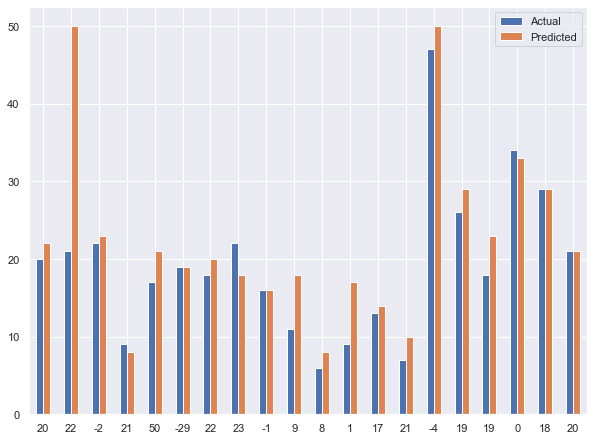

In [380]:
index = df3.iloc[:, 0:20]
df5 = pd.DataFrame({'Actual':y1, 'Predicted':y2}, index=index)
ax = df5.plot.bar(rot=0)

#### EVALUATE THE RESULTS

In [245]:
m.evaluate(xtest, ytest)

102/102 [==============================] - 0s 1ms/step


[33.74098607605579, 0.019607843831181526]

#### 3 VARIABLES

In [247]:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing per Ian McLoughlin github page (5)
# xscale = pd.DataFrame(pre.scale(df), columns=df.columns)

In [248]:
# create a neural network
m = kr.models.Sequential()

# add neurons
m.add(kr.layers.Dense(300, input_dim=3, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(300, activation="relu"))
m.add(kr.layers.Dense(300, activation="relu"))

# add layer to output prediction of MEDV, therefore size equals 1.
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     
                      
# compile the model
m.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

In [249]:
# splitting data to training and testing dataset.  

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [250]:
# use the iloc function to easily include all variable headers except 'medv'.
x = df[['rm','ptratio','lstat']]

In [251]:
y = df['medv']

In [252]:
# splitting data to training and testing dataset.  

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 3)
xtest shape  :  (102, 3)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [253]:
# train the model
# add 'early stopping' function. The more epochs means the more time it will take to run the model. If the model stops 
# improving as it runs through the epochs, 'early stopping' will stop the model.

# https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37 (8)
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
m.fit(xtrain, ytrain, epochs=100, callbacks=[early_stopping_monitor])


Epoch 1/100
404/404 [==============================] - 0s 809us/step - loss: 323.4774 - accuracy: 0.0025
Epoch 2/100
404/404 [==============================] - 0s 136us/step - loss: 132.3350 - accuracy: 0.0025
Epoch 3/100
404/404 [==============================] - 0s 141us/step - loss: 75.0018 - accuracy: 0.0000e+00
Epoch 4/100
404/404 [==============================] - 0s 168us/step - loss: 53.2653 - accuracy: 0.0099
Epoch 5/100
404/404 [==============================] - 0s 230us/step - loss: 45.6384 - accuracy: 0.0000e+00
Epoch 6/100
404/404 [==============================] - 0s 173us/step - loss: 41.8823 - accuracy: 0.0074
Epoch 7/100
404/404 [==============================] - 0s 193us/step - loss: 38.2980 - accuracy: 0.0099
Epoch 8/100
404/404 [==============================] - 0s 146us/step - loss: 34.3158 - accuracy: 0.0050
Epoch 9/100
404/404 [==============================] - 0s 168us/step - loss: 32.2165 - accuracy: 0.0025
Epoch 10/100
404/404 [==============================] 

404/404 [==============================] - 0s 148us/step - loss: 15.2687 - accuracy: 0.0149
Epoch 80/100
404/404 [==============================] - 0s 136us/step - loss: 17.7470 - accuracy: 0.0050
Epoch 81/100
404/404 [==============================] - ETA: 0s - loss: 14.1773 - accuracy: 0.031 - 0s 146us/step - loss: 16.0449 - accuracy: 0.0074
Epoch 82/100
404/404 [==============================] - 0s 146us/step - loss: 15.7915 - accuracy: 0.0198
Epoch 83/100
404/404 [==============================] - 0s 133us/step - loss: 16.1912 - accuracy: 0.0173
Epoch 84/100
404/404 [==============================] - 0s 126us/step - loss: 16.7306 - accuracy: 0.0025
Epoch 85/100
404/404 [==============================] - 0s 133us/step - loss: 15.7014 - accuracy: 0.0099
Epoch 86/100
404/404 [==============================] - 0s 118us/step - loss: 16.1094 - accuracy: 0.0149
Epoch 87/100
404/404 [==============================] - 0s 126us/step - loss: 15.2635 - accuracy: 0.0099
Epoch 88/100
404/404 [==

In [254]:
#m.predict(xtest)
p = m.predict(xtest)[:1]
p

array([[24.830183]], dtype=float32)

In [255]:
m.evaluate(xtest, ytest)

102/102 [==============================] - 0s 2ms/step


[30.109036585863898, 0.009803921915590763]

### PREDICTION CONCLUSION

## REFERENCES
1. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
2. https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
1a. https://github.com/selva86/datasets/blob/master/BostonHousing.csv
3. https://towardsdatascience.com/hypothesis-testing-using-t-test-inferential-statistics-part3-6fb43683bc32
2. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
4. https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4
5. https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/preprocessing.ipynb